<a href="https://colab.research.google.com/github/Dancsf18/PLN_/blob/main/Tendencias_suicidas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análisis de Tendencias Suicidas en Twitter: Un Proyecto Aplicado en Procesamiento de Lenguaje Natural (NLP)**

# **Importaciones**

In [ ]:
!pip install wordcloud
import pandas as pd
import plotly.express as px
import os
import spacy
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from bs4 import BeautifulSoup
import re
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import string
from bs4 import BeautifulSoup
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
from sklearn.decomposition import PCA
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# **Entendimiento del Negocio y Carga de Textos**
---

## **1. Marco de Proyecto**
---

### **1.1. Trasfondo del Negocio**
---

- ¿Quién es el cliente o los beneficiarios del proyecto? ¿En qué dominio se encuentran (marketing, medicina, entre otros)?

  Cliente o Beneficiarios del Proyecto
  Los beneficiarios principales de este proyecto son los entes del estado, tales como alcaldías, gobernaciones y otras instituciones gubernamentales. Uno de los casos de estudio en este sentido son países como Japón, que enfrenta una alta tasa de suicidios.



- ¿Qué problemas del negocio o del dominio estamos tratando de solucionar?

  Dominio del Proyecto
  El proyecto se enmarca dentro del dominio de la salud mental, una esfera crucial que requiere atención y soluciones efectivas. El objetivo primordial es utilizar técnicas de Machine Learning para analizar patrones, identificar factores de riesgo y desarrollar modelos predictivos que puedan ayudar en la prevención del suicidio y en la mejora de la salud mental en general. Este enfoque busca no solo entender los factores que contribuyen a estas situaciones, sino también proveer herramientas efectivas a los organismos gubernamentales para tomar decisiones informadas y desarrollar estrategias de intervención más precisas y dirigidas.

  Al abordar estos desafíos desde una perspectiva analítica y predictiva, se espera que este proyecto no solo beneficie a los entes gubernamentales al ofrecerles herramientas efectivas de toma de decisiones, sino que también tenga un impacto directo en la sociedad al reducir las tasas de suicidio y mejorar la calidad de vida de los ciudadanos.


### **1.2. Alcance**
---


- ¿Qué  solución de procesamiento de lenguaje natural tratamos de implementar?

    Implementaremos un modelo de Procesamiento de Lenguaje Natural (NLP) para analizar tweets y detectar patrones que puedan indicar riesgo de suicidio.

- ¿Qué  se hará?

    1.Obtención de un conjunto de datos de Kaggle con tweets etiquetados con tendencia suicida y no suicida.

    2.Procesamiento de datos: Limpieza de los textos para su análisis.

    3.Análisis descriptivo: Entendimiento a nivel descriptivo, para resolver preguntas como ¿Cuántos tweets tienen tendencia suicida? ó ¿Qué palabras aparencen con mayor frecuencia ?

    4.Modelamiento: Aplicación de un algoritmo de NLP, para clasificar los tweets.

    5.Evaluación: Determinar la precisión del modelo e iterar en caso de ser necesario.

    6.Despliegue del modelo: Habiliar el modelo para el uso del usuario final.

- ¿De qué forma el cliente o beneficiario utilizará el producto del proyecto?

    - Análisis de Impacto de Campañas de Prevención
    
    - Colaboración con Organizaciones de Salud Mental
    
    - Informes para la Sensibilización Pública.
    
    - Evaluación del Impacto en la Salud Pública


### **1.3. Plan**
---

#Actividades a realizar por semana:

Semana 1: Definición y Planificación Inicial

    Definición de Objetivos y Alcance: Establecer objetivos específicos para la detección de tendencias suicidas en tweets.

    Definir el alcance del proyecto y las métricas clave de éxito.
    
    Diseño de Arquitectura Simplificado:Esbozar una arquitectura básica del sistema, destacando las fases de recopilación, procesamiento y detección.

Semana 2: Preparación de Datos y Desarrollo Inicial

    Identificación de Fuentes de Datos y Extracción: Identificar fuentes de datos accesibles y relevantes.

    Extraer un conjunto pequeño de tweets para el desarrollo inicial.
    
    Preprocesamiento de Datos Simplificado: Realizar una limpieza inicial de datos, eliminando caracteres irrelevantes y ruido básico.
    Realizar tokenización básica.

    Desarrollo Inicial del Modelo: Seleccionar una arquitectura de modelo NLP simple.

Semana 3: Refinamiento del Modelo y Evaluación Preliminar

    Entrenamiento y Ajuste del Modelo:Entrenar el modelo con el conjunto de datos etiquetados.

    Realizar ajustes preliminares en base a la evaluación inicial.

    Evaluación Preliminar de Rendimiento:Evaluar el rendimiento del modelo con un conjunto de datos de prueba limitado.

    Identificar posibles áreas de mejora.

Semana 4: Análisis de resultados y corrección de errores


## **2. Definición del Corpus**
---

### **2.1. Origen**
---

- ¿De dónde vienen los textos?
 - Los textos van a ser descargados de Kaggle de este enlace: https://www.kaggle.com/datasets/nikhileswarkomati/suicide-watch?resource=download


 - ¿Se usa alguna herramienta o proceso para la descarga de la información textual?

  - Se realizó el manejo de la base de datos utilizando la conexión de google colaboratory con Google Drive.

### **2.2. Descripción del DataSet**
---


Origen de los Datos

Este conjunto de datos es una recopilación de publicaciones de los subreddits "SuicideWatch" y "depression" en la plataforma Reddit, creado como parte del proyecto final del Diplomado en Inteligencia Artificial.

SuicideWatch: Todas las publicaciones realizadas desde el 16 de diciembre de 2008 (fecha de creación) hasta el 2 de enero de 2021 fueron recopiladas.

depression: Las publicaciones en este subreddit fueron recopiladas desde el 1 de enero de 2009 hasta el 2 de enero de 2021.

Además, se incluyeron publicaciones no relacionadas con el suicidio del subreddit r/teenagers para ampliar la diversidad del conjunto de datos.

Etiquetado de las Publicaciones
Todas las publicaciones recopiladas de "SuicideWatch" están etiquetadas como "suicidio".
Las publicaciones del subreddit "depression" están etiquetadas como "depresión".
Las publicaciones no relacionadas con el suicidio del subreddit r/teenagers están etiquetadas como "adolescentes" para representar conversaciones normales entre adolescentes.
Versiones del Conjunto de Datos
Versión Actual (V1): Incluye etiquetas para "suicidio" y "no suicidio".

Versión 13 (V13): Esta versión incluye etiquetas adicionales para "suicidio", "depresión" y "adolescentes" (conversaciones normales).

Propósito y Utilidad

Este conjunto de datos fue creado con el propósito de ser una herramienta útil para aquellos que buscan datos para la detección de ideación suicida en redes sociales. La inclusión de etiquetas para diferentes tipos de publicaciones permite una mayor flexibilidad y precisión en la investigación y desarrollo de modelos de inteligencia artificial para esta tarea.

Se proporciona un cuaderno de ejemplo que muestra cómo recopilar las publicaciones de Reddit utilizando la API de PushShift. Esto puede ser de gran ayuda para aquellos que deseen ampliar o actualizar el conjunto de datos en el futuro.

Esperamos que este conjunto de datos ahorre tiempo y recursos a investigadores y desarrolladores interesados en abordar este importante tema de salud mental.


### **2.3. Carga o Adquisición de Textos**
---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Ruta del archivo que deseas revisar
ruta_archivo = '/content/drive/MyDrive/Proyecto/Suicide_Detection.csv'
# Lee el archivo CSV
df = pd.read_csv(ruta_archivo)
# Seleccionar las columnas con el text y la clase
df = df[['text','class']]

## **3. Análisis exploratorio de los textos**
---

### **3.1. ¿Cuántos documentos tiene el corpus?**

El corpus esta compuesto por 232074 documentos tweets, y estos estan etiquetados con tendencia suicida y no suicida.

In [ ]:
#Se utiliza la instrucción shape para saber el número de documentos (filas) 232074 y el número de columnas 2.
df.shape

(232074, 2)

### **3.2. ¿En qué idioma se encuentran?**

Los Tweets se encuentran el idioma inglés

In [ ]:
df

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
...,...,...
232069,If you don't like rock then your not going to ...,non-suicide
232070,You how you can tell i have so many friends an...,non-suicide
232071,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide
232072,The usual stuff you find hereI'm not posting t...,suicide


### **3.3. ¿Qué tamaño en MB tiene el corpus?**

In [ ]:
# Obtener el tamaño del archivo en bytes
tamano_bytes = os.path.getsize(ruta_archivo)

# Convertir el tamaño a  megabytes
tamaño_mb = tamano_bytes /  (1024 * 1024)

# Imprimir el tamaño del archivo
print(f"Tamaño del archivo en megabytes: {tamaño_mb:.2f} MB")

Tamaño del archivo en megabytes: 159.17 MB


### **3.4.¿Hay alguna relación entre distintos documentos del corpus?**

Si, el corpus son tweets con tendencia suicida y no suicida, y se tienen 116037 tweets con tendencia suicida y otros 116037 tweets con tendencia no suicida. A continuación, se presenta un gráfico en el que se ilustra lo mencionado.

In [ ]:
# Agrupar por clasificación y contar la cantidad de "tweets" en cada grupo
conteo_por_clasificacion = df.groupby('class').count()['text'].reset_index()

# Crear el gráfico de barras con Plotly
fig = px.bar(conteo_por_clasificacion, x='class', y='text',
             labels={'class': 'Class', 'text': 'Number of tweets'},
             title='Number of tweets by class')

# Personalizar el gráfico
fig.update_layout(xaxis_title='Class', yaxis_title='Number of tweets', title='Number of tweets by class')
fig.update_traces(marker_color=['#1f77b4', '#ff7f0e', '#2ca02c'])
fig.update_layout(barmode='group', bargap=0.15)
fig.update_traces(texttemplate='%{value}', textposition='outside')

fig.show()

### **3.5. ¿Hay datos faltantes o documentos vacíos?**

No hay valores faltantes, como se aprecia en el gráfico, no se tienen datos faltantes o documentos vacíos.

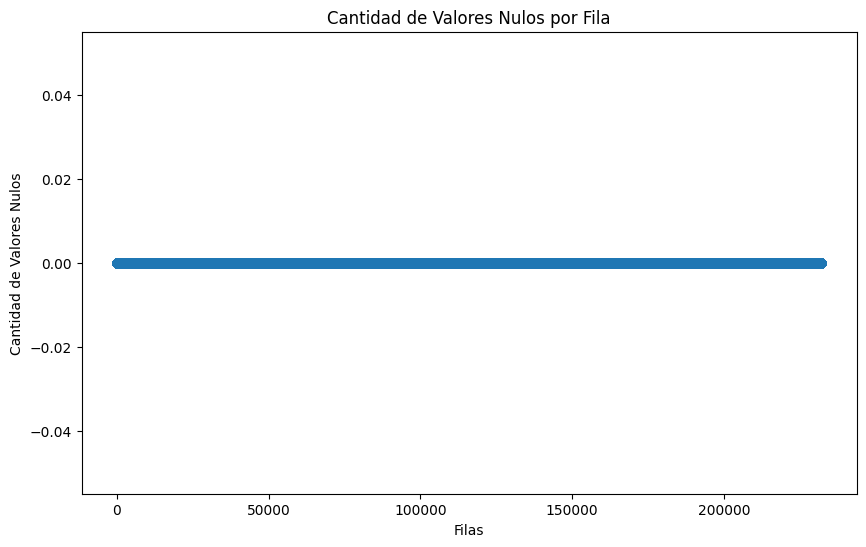

In [ ]:
# Calcular la cantidad de valores nulos por fila
cantidad_nulos_por_fila = df.isnull().sum(axis=1)

# Crear un gráfico de puntos o líneas
plt.figure(figsize=(10, 6))
plt.plot(cantidad_nulos_por_fila, marker='o', linestyle='-')
plt.title('Cantidad de Valores Nulos por Fila')
plt.xlabel('Filas')
plt.ylabel('Cantidad de Valores Nulos')
plt.show()

### **3.6. ¿Hay mezcla de idiomas en el corpus?, ¿qué se puede hacer al respecto?**

El corpus viene en inglés, en caso de tener varios idiomas, habría que aplicar técnicas de detección del idioma y de traducción, para homogenizar todo al mismo idioma.

In [ ]:
df.head()

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


### **3.7. ¿El corpus tiene una variable objetivo a estimar?, de ser así, ¿es una variable continúa o categórica?**

Si, el objetivo es desarrollar un modelo de clasificación binario que permita identificar que un tweet tenga o no una tendencia suicida. Por ende, la variable a predecir u objetivo es la variable class, que se encarga de clasificar los documentos del corpus en textos con tendencia suicida o no. Es una variable categórica nominal y sus categorías son suicide y non-suicide.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    232074 non-null  object
 1   class   232074 non-null  object
dtypes: object(2)
memory usage: 3.5+ MB


In [ ]:
##Valores únicos de la column class
valores_unicos = df['class'].unique()
print(valores_unicos)

['suicide' 'non-suicide']


### **3.8. Analice la distribución de las etiquetas, identifique si hay desbalanceo de datos.**

No existe desbalanceo de datos, porque las etiquetas tienen igual número de observaciones. Hay 116037 docuementos para la etiqueta de 'suicide' y para la clase de 'non-suicide', existe el mismo número de observaciones.

In [ ]:
# Agrupar por clasificación y contar la cantidad de "tweets" en cada grupo
conteo_por_clasificacion = df.groupby('class').count()['text'].reset_index()

# Crear el gráfico de barras con Plotly
fig = px.bar(conteo_por_clasificacion, x='class', y='text',
             labels={'class': 'Class', 'text': 'Number of tweets'},
             title='Number of tweets by class')

# Personalizar el gráfico
fig.update_layout(xaxis_title='Class', yaxis_title='Number of tweets', title='Number of tweets by class')
fig.update_traces(marker_color=['#1f77b4', '#ff7f0e', '#2ca02c'])
fig.update_layout(barmode='group', bargap=0.15)
fig.update_traces(texttemplate='%{value}', textposition='outside')

fig.show()

### **3.9. Nube de palabras con tendencia suicida**

Se aprecia que en los documentos con tendencia suicida, aparecen palabras con mucha frecuencia como feel, life, really, want, know y entre otras.


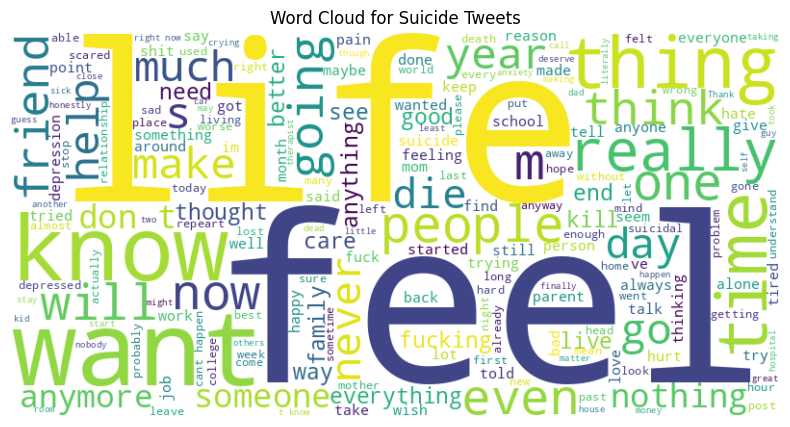

In [ ]:
#Para agilizar el procesamiento se hace un muestreo aleatorio simple
muestra_aleatoria = df.sample(frac=0.005, random_state=42)
#Filtrar la muestra por los que tienen tendencia suicide
df_suicida = muestra_aleatoria[muestra_aleatoria['class']=='suicide']
# Combina todos los textos en una única cadena de texto
textos_combinados = ' '.join(df_suicida['text'])
# Crea una instancia de WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='#FFFFFF').generate(textos_combinados)
# Muestra la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Suicide Tweets')
plt.show()

### **3.10. Nube de palabras con tendencia no suicida**

En cambio en los documentos con tendencia no suicida, se aprecia que la mayoría de palabras tiene la misma o similar frecuencia, indicando la aleatoridad de las mismas

In [ ]:
df_non_suicida = muestra_aleatoria[muestra_aleatoria['class']=='non-suicide']

# Combina todos los textos en una única cadena
textos_combinados = ' '.join(df_non_suicida['text'])

# Crea una instancia de WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='#FFFFFF').generate(textos_combinados)

# Muestra la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Non-suicide Tweets')
plt.axis('off')
plt.show()

## **4. Limpieza de texto**

### **4.1 Función de preprocesamiento**

In [ ]:
def clean_tweet(tweet):
    # Eliminar el @
    tweet = re.sub(r"@[A-Za-z0-9]+", ' ', tweet)
    # Eliminar los links de la URL
    tweet = re.sub(r"https?://[A-Za-z0-9./]+", ' ', tweet)
    # Conservamos solamente las letras
    tweet = re.sub(r"[^a-zA-Z.!?']", ' ', tweet)
    # Eliminamos espacios en blanco adicionales
    tweet = re.sub(r" +", ' ', tweet)
    # Convertir el texto a minúsculas, es decir, quitamos grafía
    tweet = tweet.lower()
    # Tokenizar el texto para eliminar palabras vacías
    tokens = tweet.split()
    # Filtrar palabras con más de dos caracteres
    filtered_words = [word for word in tokens if len(word) > 2]
    # Unir textos
    tweet = " ".join(filtered_words)
    # Eliminar espacios al inicio y al final
    tweet = tweet.strip()
    return tweet

df_clean = df.copy()
df_clean['text'] = df_clean['text'].apply(clean_tweet)

### **4.2 Conjunto de datos después de la limpieza**

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    232074 non-null  object
 1   class   232074 non-null  object
dtypes: object(2)
memory usage: 3.5+ MB


In [ ]:
df_clean.to_csv(f"/content/drive/MyDrive/Proyecto/Clean_Suicide_Detection.csv", index=False)

* WordCloud con datos limpios

Después de la limpieza observamos que la disttribución de las palabras tanto con la caegoría suicide como no-suicide se mantiene. Y además, de que observamos de que en los documentos con tendencia suicida si hay algunas palablras que aparecen con mucha frecuencia como life, feel y entre otras, a diferencia de la distribución de los documentos no-suicidas, donde la distribución es más aleatoria.

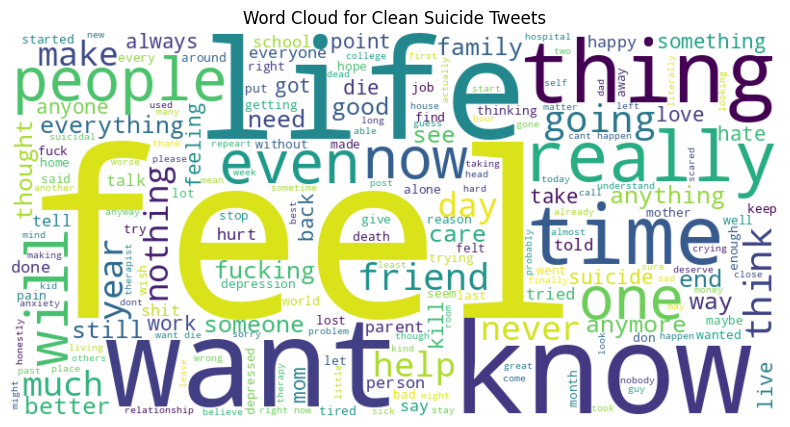

In [ ]:
muestra_aleatoria_clean = df_clean.sample(frac=0.005, random_state=42)
df_suicida_clean = muestra_aleatoria_clean[muestra_aleatoria_clean['class'] == 'suicide']
textos_combinados_clean = ' '.join(df_suicida_clean['text'])

wordcloud_clean = WordCloud(width=800, height=400, background_color='#FFFFFF').generate(textos_combinados_clean)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_clean, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Clean Suicide Tweets')
plt.show()

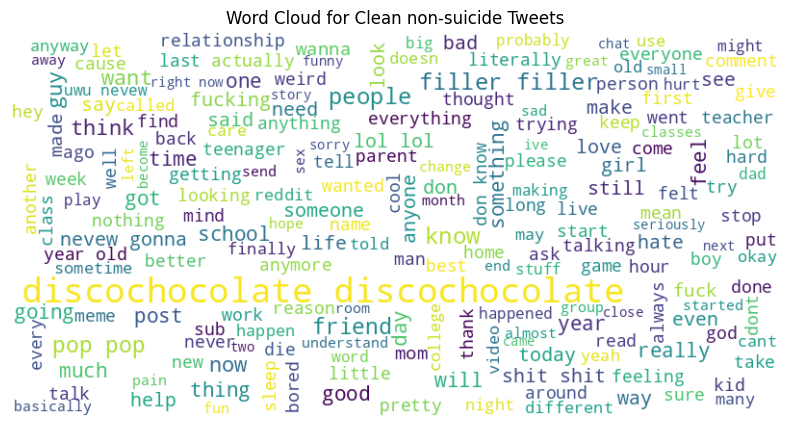

In [ ]:
muestra_aleatoria_clean = df_clean.sample(frac=0.005, random_state=42)
df_non_suicida_clean = muestra_aleatoria_clean[muestra_aleatoria_clean['class'] == 'non-suicide']
textos_combinados_clean = ' '.join(df_non_suicida_clean['text'])

wordcloud_clean = WordCloud(width=800, height=400, background_color='#FFFFFF').generate(textos_combinados_clean)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_clean, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Clean non-suicide Tweets')
plt.show()

## **5. Extracción de caracteristicas**

Se dispone de un corpus con más de 10 mil documentos técnicos, y se plantea la posibilidad de emplear técnicas como Word2Vec, FastText o Doc2Vec para llevar a cabo la extracción de características. La elección de estas técnicas se justifica en el hecho de que métodos como Bag-of-Words o TF-IDF, al perder la secuencia y contexto del texto, no son ideales para la construcción de un modelo de clasificación que distinga entre documentos con tendencias suicidas y no suicidas. Se busca considerar tanto la secuencia como el contenido del texto en el proceso.

En un inicio, se propone la extracción de características mediante las tres técnicas mencionadas (Word2Vec, FastText y Doc2Vec), seguido de la construcción de un modelo de clasificación con cada una de ellas. Este enfoque permitirá comparar los resultados obtenidos y validar cuál estrategia para la creación de embeddings demuestra un mejor rendimiento.

Al revisar la literatura, es importante señalar que Doc2Vec se presenta como una extensión del modelo Word2Vec, posibilitando la representación de documentos de longitud variable mientras preserva la información semántica. Dicha técnica ha demostrado ser ampliamente utilizada en la elaboración de modelos de clasificación. Dado que se cuenta con 116,037 tweets con tendencia suicida y otros 116,037 con tendencia no suicida, y se aspira a construir un modelo capaz de identificar la tendencia en nuevos tweets, se considera que la opción más adecuada sería la implementación de Doc2Vec.

### **5.1 Implementación del Embedding**

In [ ]:
!pip install gensim

In [ ]:
# Ruta del archivo que deseas revisar
ruta_archivo = '/content/drive/MyDrive/Proyecto/Clean_Suicide_Detection.csv'
# Lee el archivo CSV
df = pd.read_csv(ruta_archivo)
# Seleccionar las columnas con el text y la clase
df = df[['text','class']]

df = df.sample(frac=0.05, random_state=42)

df['class'].value_counts()

non-suicide    5848
suicide        5756
Name: class, dtype: int64

### **5.2 Segunda función de limpieza de los datos**


Al realizar una función de preprocesamiento de datos mejorada, estamos fortaleciendo la robustez y eficiencia de nuestro flujo de trabajo. Esta revisión se basa en las lecciones aprendidas durante el análisis exploratorio inicial y la experiencia acumulada durante el proceso. La decisión de trabajar con una fracción del corpus original se tomó para optimizar los costos computacionales y agilizar el proceso de entrenamiento y evaluación del modelo.

El objetivo principal de esta mejora es optimizar la calidad de los datos y el rendimiento del modelo resultante. Esto implica la implementación de técnicas de preprocesamiento más efectivas, como limpieza de texto, tokenización, eliminación de stop words y lematización, entre otros. Además, se pueden considerar mejoras en la ingeniería de características para capturar mejor la información relevante de los datos.

Al priorizar la eficiencia computacional y la calidad de los datos, podemos iterar más rápidamente en el desarrollo del modelo y obtener resultados más precisos y significativos. Esta estrategia refleja un enfoque práctico y centrado en la mejora continua, permitiéndonos adaptarnos y responder de manera efectiva a los desafíos y oportunidades que surgen durante el proceso de modelado de datos.

In [ ]:
#def clean_tweet(tweet):
    # Eliminar el @
 #   tweet = re.sub(r"@[A-Za-z0-9]+", ' ', tweet)
    # Eliminar los links de la URL
  #  tweet = re.sub(r"https?://[A-Za-z0-9./]+", ' ', tweet)
    # Conservamos solamente las letras
  #  tweet = re.sub(r"[^a-zA-Z.!?']", ' ', tweet)
    # Eliminamos espacios en blanco adicionales
  #  tweet = re.sub(r" +", ' ', tweet)
    # Convertir el texto a minúsculas, es decir, quitamos grafía
  #  tweet = tweet.lower()
    # Eliminar palabras vacías
  #  tweet = ' '.join(word for word in tweet.split() if word.lower() not in set(stopwords.words('english')))
    # Eliminar espacios al inicio y al final
  #  tweet = tweet.strip()
  #  return tweet
def clean_tweet(tweet):
    if isinstance(tweet, str):
        # Eliminar el @
        tweet = re.sub(r"@[A-Za-z0-9]+", ' ', tweet)
        # Eliminar los links de la URL
        tweet = re.sub(r"https?://[A-Za-z0-9./]+", ' ', tweet)
        # Conservar solamente las letras
        tweet = re.sub(r"[^a-zA-Z.!?']", ' ', tweet)
        # Eliminar espacios en blanco adicionales
        tweet = re.sub(r" +", ' ', tweet)
        # Convertir el texto a minúsculas, es decir, quitar grafía
        tweet = tweet.lower()
        # Eliminar palabras vacías
        tweet = ' '.join(word for word in tweet.split() if word.lower() not in set(stopwords.words('english')))
        # Eliminar espacios al inicio y al final
        tweet = tweet.strip()
    else:
        tweet = ''  # O puedes manejar de otra manera, como reemplazar con una cadena vacía ''
    return tweet

df_clean = df.copy()

# Definir una función de retorno de llamada para imprimir el número de registros procesados
def print_processed_count(processed_count):
    print("Número de registros procesados:", processed_count)

# Inicializar el contador de registros procesados
processed_count = 0

# Aplicar la función clean_tweet a la columna 'text' y llamar a la función de retorno de llamada después de cada llamada
for index, row in df_clean.iterrows():
    df_clean.at[index, 'text_'] = clean_tweet(row['text'])
    processed_count += 1
    print_processed_count(processed_count)

# Imprimir el número total de registros procesados
print("Procesamiento completo. Total de registros procesados:", processed_count)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Número de registros procesados: 6606
Número de registros procesados: 6607
Número de registros procesados: 6608
Número de registros procesados: 6609
Número de registros procesados: 6610
Número de registros procesados: 6611
Número de registros procesados: 6612
Número de registros procesados: 6613
Número de registros procesados: 6614
Número de registros procesados: 6615
Número de registros procesados: 6616
Número de registros procesados: 6617
Número de registros procesados: 6618
Número de registros procesados: 6619
Número de registros procesados: 6620
Número de registros procesados: 6621
Número de registros procesados: 6622
Número de registros procesados: 6623
Número de registros procesados: 6624
Número de registros procesados: 6625
Número de registros procesados: 6626
Número de registros procesados: 6627
Número de registros procesados: 6628
Número de registros procesados: 6629
Número de registros procesados: 6630
Número d

El código anterior tiene como objetivo realizar una limpieza y preprocesamiento de los tweets almacenados en el DataFrame. La función clean_tweet se encarga de esto: elimina menciones a otros usuarios, enlaces URL, caracteres no alfabéticos, espacios en blanco adicionales y convierte todo el texto a minúsculas. Además, se eliminan palabras vacías del idioma inglés para centrarse en las palabras más informativas. Luego, se crea una copia del DataFrame original y se inicia un bucle que aplica la función clean_tweet a cada tweet en la columna 'text', almacenando los resultados en una nueva columna llamada 'text_'. Se imprime el número de registros procesados después de cada iteración para seguir el progreso. Finalmente, se muestra el número total de registros procesados al finalizar el bucle.

In [ ]:
df_clean.head()

,text,class,text_
74414,don't know? months self harm free and the urge...,suicide,know? months self harm free urge gets stronger...
149516,have start becoming rich have start company wh...,non-suicide,start becoming rich start company become affor...
12484,poem haiku for game dev hello hello stop fucki...,non-suicide,poem haiku game dev hello hello stop fucking s...
14043,i've honestly got idea what anymore.it feels e...,suicide,i've honestly got idea anymore.it feels everyo...
30673,you ever just cry? like you just think about h...,non-suicide,ever cry? like think unfair life cry? can't cr...


### **5.3 Nueva base con datos limpios**

In [ ]:
df_clean.to_csv(f"/content/drive/MyDrive/Proyecto/Clean_Suicide_Detection.csv", index=False)

In [ ]:
# Lee el archivo CSV
df_clean_embeddings = pd.read_csv(f"/content/drive/MyDrive/Proyecto/Clean_Suicide_Detection.csv")
# Seleccionar las columnas con el text_ y la clase
df_clean_embeddings = df_clean_embeddings[['text_','class']]
df_clean_embeddings['text_'] = df_clean_embeddings['text_'].apply(str)

In [ ]:
df_clean_embeddings.head()

,text_,class
0,know? months self harm free urge gets stronger...,suicide
1,start becoming rich start company become affor...,non-suicide
2,poem haiku game dev hello hello stop fucking s...,non-suicide
3,i've honestly got idea anymore.it feels everyo...,suicide
4,ever cry? like think unfair life cry? can't cr...,non-suicide



El código presentado realiza varias operaciones para el preprocesamiento de textos y la generación de embeddings utilizando el modelo Doc2Vec. En primer lugar, se define una función de preprocesamiento (preprocess_text) que tokeniza el texto de entrada. Luego, se construye un conjunto de datos etiquetado (tagged_data) donde cada texto preprocesado se asocia con una etiqueta única. A continuación, se define y entrena un modelo Doc2Vec con los parámetros especificados. Una vez entrenado el modelo, se itera sobre cada texto en el DataFrame original (df_clean_embeddings), y se genera un embedding para cada uno utilizando el método infer_vector del modelo entrenado. Estos embeddings se almacenan en una nueva columna llamada 'embeddings' en el DataFrame. Este proceso permite representar cada texto como un vector numérico, lo que facilita su uso en tareas de modelado de datos posteriores.

In [ ]:
# Preprocesamiento de los textos
def preprocess_text(text):
    tokens = word_tokenize(text)
    return tokens

# Paso 2: Entrenamiento del modelo Doc2Vec
tagged_data = [TaggedDocument(words=preprocess_text(text), tags=[str(i)]) for i, text in enumerate(df_clean_embeddings['text_'])]

# Definir el modelo Doc2Vec
model = Doc2Vec(vector_size=100, window=5, min_count=1, workers=4, epochs=20)

# Construir el vocabulario
model.build_vocab(tagged_data)

# Entrenar el modelo
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

# Paso 3: Obtención de embeddings y guardarlos en una nueva columna
df_clean_embeddings['embeddings'] = None  # Inicializa la columna 'embeddings' con valores nulos

for index, text in enumerate(df_clean_embeddings['text_']):
    print(f"Convirtiendo texto {index+1} en vector...")
    embedding = model.infer_vector(preprocess_text(text))
    df_clean_embeddings.at[index, 'embeddings'] = embedding

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Convirtiendo texto 6605 en vector...
Convirtiendo texto 6606 en vector...
Convirtiendo texto 6607 en vector...
Convirtiendo texto 6608 en vector...
Convirtiendo texto 6609 en vector...
Convirtiendo texto 6610 en vector...
Convirtiendo texto 6611 en vector...
Convirtiendo texto 6612 en vector...
Convirtiendo texto 6613 en vector...
Convirtiendo texto 6614 en vector...
Convirtiendo texto 6615 en vector...
Convirtiendo texto 6616 en vector...
Convirtiendo texto 6617 en vector...
Convirtiendo texto 6618 en vector...
Convirtiendo texto 6619 en vector...
Convirtiendo texto 6620 en vector...
Convirtiendo texto 6621 en vector...
Convirtiendo texto 6622 en vector...
Convirtiendo texto 6623 en vector...
Convirtiendo texto 6624 en vector...
Convirtiendo texto 6625 en vector...
Convirtiendo texto 6626 en vector...
Convirtiendo texto 6627 en vector...
Convirtiendo texto 6628 en vector...
Convirtiendo texto 6629 en vector...
Convirti

### **5.4 Exploración del Embedding**

#### **5.4.1 Reducción de los embeddings a dos dimensiones con PCA**

Al examinar el gráfico de los componentes principales, se evidencia que los embeddings logran capturar un patrón distintivo. Se observa la formación de un grupo rojo, correspondiente a los documentos con tendencia suicida, y un grupo verde que representa documentos con tendencia no suicida. Además, se identifican algunos puntos atípicos, principalmente dentro de los datos con tendencia no suicida, que se distancian significativamente de la nube de puntos verde que tiende a conformarse.

Este hallazgo es particularmente intrigante, ya que sugiere que la extracción de características es exitosa. La capacidad para distinguir entre documentos con tendencia suicida y no suicida se refleja de manera cuantitativa a través de los embeddings. Este resultado respalda la efectividad del proceso de extracción de características al revelar de manera visual y cuantitativa las diferencias entre los dos grupos de documentos.

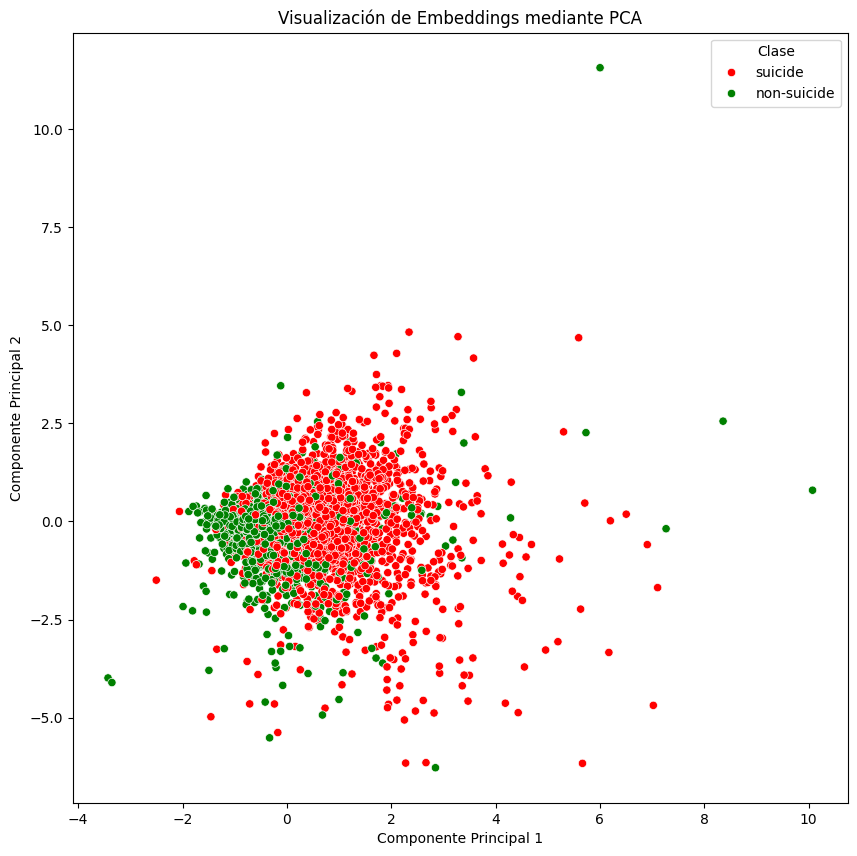

In [ ]:

# Definir la función lambda
convert_to_binary = lambda x: 1 if x == 'suicide' else 0

# Aplicar la función lambda a la columna 'class' y crear una nueva columna llamada 'binary_class'
df_clean_embeddings['binary_class'] = df_clean_embeddings['class'].apply(convert_to_binary)

# Crear un objeto PCA para reducir la dimensionalidad a 2
pca = PCA(n_components=2)

# Aplicar PCA a los vectores de la columna 'embeddings' y obtener las dos nuevas columnas
pca_result = pca.fit_transform(df_clean_embeddings['embeddings'].tolist())

# Agregar las dos nuevas columnas al dataframe
df_clean_embeddings['pca1'] = pca_result[:, 0]
df_clean_embeddings['pca2'] = pca_result[:, 1]
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue="class", data=df_clean_embeddings,
                     palette=["red", "green"])
plt.title("Visualización de Embeddings mediante PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Clase", loc="upper right")
plt.show()

#### **5.4.2 Nubes de palabras**

Tras la etapa de limpieza, se evidencia que en los documentos con tendencia suicida, ciertas palabras, tales como "life" y "feel", exhiben una frecuencia notablemente elevada. En contraste, en la distribución de los documentos no suicidas, la frecuencia de las palabras tiende a mantenerse de manera más uniforme y no se observa la misma prominencia de términos con una frecuencia tan elevada. Este contraste sugiere que las palabras específicas mencionadas anteriormente podrían desempeñar un papel significativo en el contenido de los documentos con tendencia suicida, destacándose por su recurrencia frecuente. La exploración más detallada de estas palabras distintivas podría proporcionar una visión más profunda de los temas y emociones recurrentes presentes en los documentos clasificados como suicidas, contribuyendo así a una comprensión más completa de las características lingüísticas asociadas con estas tendencias.

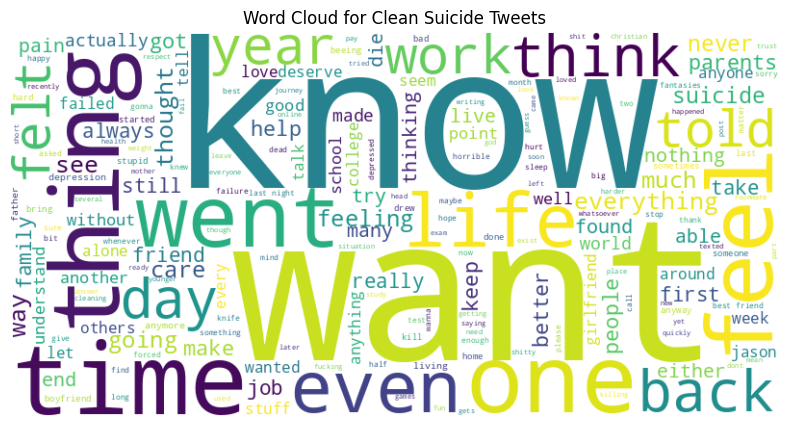

In [ ]:
muestra_aleatoria_clean = df_clean_embeddings.sample(frac=0.005, random_state=42)
df_suicida_clean = muestra_aleatoria_clean[muestra_aleatoria_clean['class'] == 'suicide']
textos_combinados_clean = ' '.join(df_suicida_clean['text_'])

wordcloud_clean = WordCloud(width=800, height=400, background_color='#FFFFFF').generate(textos_combinados_clean)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_clean, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Clean Suicide Tweets')
plt.show()

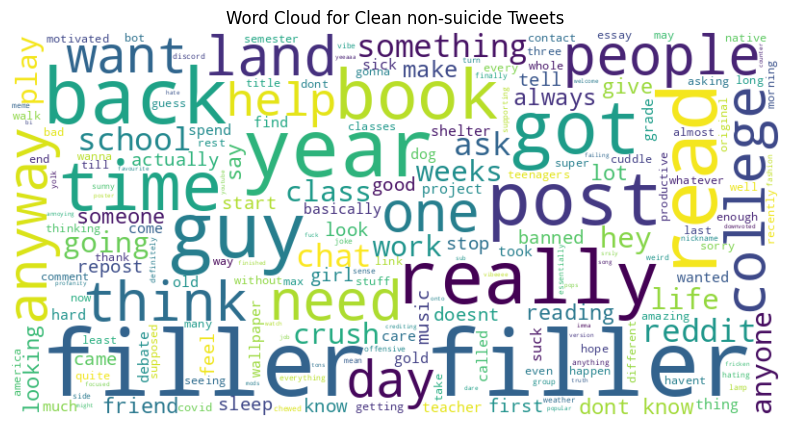

In [ ]:
muestra_aleatoria_clean = df_clean_embeddings.sample(frac=0.005, random_state=42)
df_non_suicida_clean = muestra_aleatoria_clean[muestra_aleatoria_clean['class'] == 'non-suicide']
textos_combinados_clean = ' '.join(df_non_suicida_clean['text_'])

wordcloud_clean = WordCloud(width=800, height=400, background_color='#FFFFFF').generate(textos_combinados_clean)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_clean, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Clean non-suicide Tweets')
plt.show()

#### **5.4.3 Histogramas**

Se ha generado un histograma que representa los valores de los embeddings reducidos a una dimensión. En la observación de este histograma, se destaca la presencia de una distribución aparentemente simétrica, aunque se identifican algunos valores atípicos o extremos que se desvían significativamente del patrón general. Estos valores inusuales, al encontrarse en los extremos de la distribución, sugieren la existencia de ciertos documentos que exhiben características notables o excepcionales en relación con la mayoría de los datos. Explorar más detalladamente estos valores atípicos podría proporcionar insights valiosos sobre patrones específicos presentes en los documentos analizados y contribuir a una comprensión más profunda de la variabilidad en los embeddings unidimensionales.

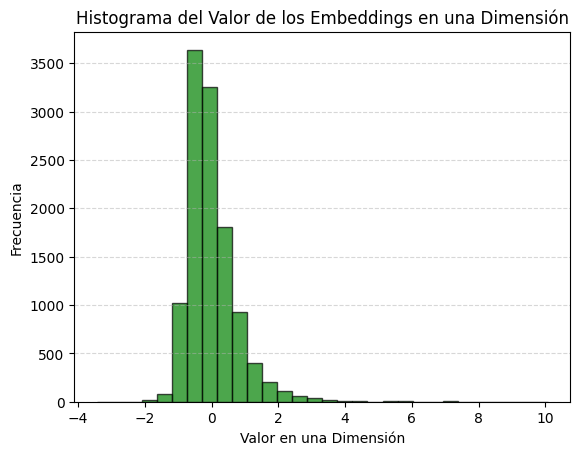

In [ ]:
# Crear un objeto PCA para reducir la dimensionalidad a 2
pca = PCA(n_components=2)

# Aplicar PCA a los vectores de la columna 'embeddings' y obtener las dos nuevas columnas
pca_result = pca.fit_transform(df_clean_embeddings['embeddings'].tolist())

# Agregar las dos nuevas columnas al dataframe
df_clean_embeddings['pca1_one_dimension'] = pca_result[:, 0]


# Crear el histograma
plt.hist(df_clean_embeddings['pca1_one_dimension'], bins=30, color='green', edgecolor='black', alpha=0.7)

# Añadir etiquetas y título
plt.xlabel('Valor en una Dimensión')
plt.ylabel('Frecuencia')
plt.title('Histograma del Valor de los Embeddings en una Dimensión')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Se ha generado un histograma representando los valores de los embeddings reducidos a una dimensión para los documentos con tendencia suicida. En la observación de este histograma, se destaca una distribución simétrica con algunos valores atípicos, y la forma general se inclina hacia una mesocurtosis. Por otro lado, al analizar los documentos con tendencia no suicida, se observa una forma leptocúrtica en la distribución, indicando que los valores se concentran más alrededor de la media. Además, también se identifican algunos valores atípicos en esta categoría.

Al profundizar en un análisis detallado, surge la oportunidad intrigante de examinar más de cerca los documentos que exhiben valores atípicos. Este enfoque, contextualizado dentro del problema en cuestión, proporcionaría una comprensión más profunda de por qué estos tweets se desvían notablemente de la mayoría. Este análisis más detallado podría arrojar luz sobre patrones inusuales o características distintivas en los tweets que podrían tener relevancia para la detección de tendencias suicidas.

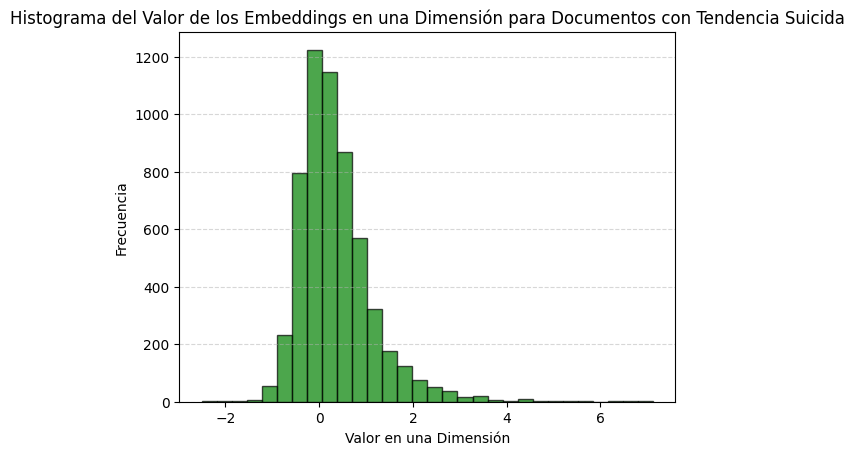

In [ ]:
# Crear el histograma
df_clean_embeddings_s = df_clean_embeddings[df_clean_embeddings['class']=='suicide']

plt.hist(df_clean_embeddings_s['pca1_one_dimension'], bins=30, color='green', edgecolor='black', alpha=0.7)

# Agregar etiquetas y título
plt.xlabel('Valor en una Dimensión')
plt.ylabel('Frecuencia')
plt.title('Histograma del Valor de los Embeddings en una Dimensión para Documentos con Tendencia Suicida')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

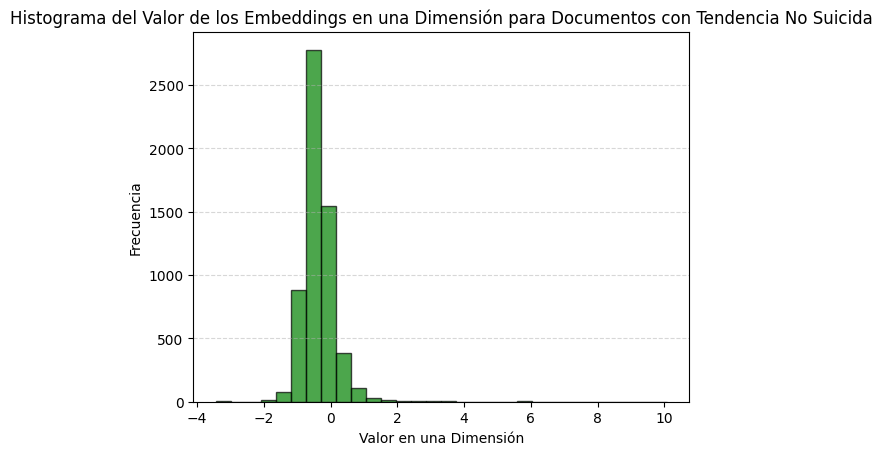

In [ ]:
# Crear el histograma
df_clean_embeddings_s = df_clean_embeddings[df_clean_embeddings['class']=='non-suicide']

plt.hist(df_clean_embeddings_s['pca1_one_dimension'], bins=30, color='green', edgecolor='black', alpha=0.7)

# Agregar etiquetas y título
plt.xlabel('Valor en una Dimensión')
plt.ylabel('Frecuencia')
plt.title('Histograma del Valor de los Embeddings en una Dimensión para Documentos con Tendencia No Suicida')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

## **6. Modelamiento y evaluación**

### **6.1 Tipo de Modelamiento**

6.1 Tipo de Modelamiento
Para abordar la tarea de identificar si un documento (tweet) tiene una tendencia suicida o no suicida, es viable utilizar algoritmos de clasificación como Gaussian Naive Bayes (GaussianNB) o XGBoost. GaussianNB es un modelo probabilístico eficiente, especialmente adecuado para conjuntos de datos pequeños, pero asume independencia condicional de características. En cambio, XGBoost es un algoritmo de gradient boosting que ofrece alta precisión en conjuntos de datos grandes y complejos.

### **6.2 Implementación del modelo**

### **6.2.1 Importar Modelo**
---

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### **6.2.2 Entrenamiento del Modelo y Selección de Hiperparámetros**
---

Realizamos la división de los datos en conjuntos de entrenamiento y prueba utilizando la función train_test_split. La variable features representa las características, y labels son las etiquetas asociadas a esos documentos (tendencia suicida o no suicida). El 30% de los datos se destina al conjunto de prueba, mientras que el 70% se utiliza para el entrenamiento. La semilla (random_state) garantiza reproducibilidad, y stratify=labels asegura que la distribución de etiquetas se mantenga en ambos conjuntos.

Luego, se define un diccionario de parámetros param_grid para la búsqueda de hiperparámetros del modelo Gaussian Naive Bayes (GaussianNB). Se utiliza la técnica de GridSearchCV para explorar diferentes valores del hiperparámetro var_smoothing, que controla la suavización de la matriz de covarianza en GaussianNB. La búsqueda se realiza mediante validación cruzada con 5 pliegues (cv=5).

Finalmente, se ejecuta la búsqueda de hiperparámetros (gsearch.fit) utilizando los datos de entrenamiento (features_train y labels_train). El código también muestra el tamaño de las matrices de características de entrenamiento y prueba para verificar la correcta realización de la división de datos.

In [ ]:
#Se crea el corpus anotado
tagged_corpus = [
        TaggedDocument(doc.split(), [i])
        for i, doc in enumerate(df_clean_embeddings.text_.to_list())
        ]

In [ ]:
#Se entrena el embedding
embedding = Doc2Vec(
        tagged_corpus,
        vector_size=100, #Tamanio de vectores
        alpha=1e-3, #tasa de aprendizaje
        epochs=1000, #numero de epocas
        workers=-1 #trabajores (utilizando todos los nucleos de CPU disponibles)
        )
display(embedding)

In [ ]:
#Se construye la matriz de características con base en el embedding
features = list(map(lambda doc: embedding.infer_vector(doc.words), tagged_corpus))
features = np.vstack(features)
display(features.shape)

(11604, 100)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labeler = LabelEncoder().fit(df_clean_embeddings['class'])
display(labeler)

LabelEncoder()

In [ ]:
labels = labeler.transform(df_clean_embeddings['class'])

In [ ]:
#División de los conjuntos de datos en entrenamiento y test
features_train, features_test, labels_train, labels_test = train_test_split(
    features,
    labels,
    test_size=0.3, # tamaño del conjunto de prueba
    random_state=13, # semilla de números aleatorios
    stratify=labels, # mantenemos distribución de etiquetas
    )

In [ ]:
from sklearn.naive_bayes import GaussianNB
#Aplicación de validación cruzada y el método GridSearchCV, para obtener los mejores hiperparámetros
param_grid = {"var_smoothing": 10. ** np.arange(-9, -3)}

gsearch = GridSearchCV(
    GaussianNB(),
    param_grid=param_grid,
    cv=5
    ).fit(features_train, labels_train)


# Se revisa el tamaño de las matrices
display(features_train.shape)
display(features_test.shape)

(8122, 100)

(3482, 100)

In [ ]:
#Se asigna el mejor modelo encontrado durante la busqueda y se asigna a model
model = gsearch.best_estimator_
display(model)

GaussianNB()

## **7. Evaluación o Aplicación del modelo**

La evaluación de la matriz de confusión y el reporte de clasificación revela un desempeño insatisfactorio del modelo, con métricas que no superan el 0.5. Este rendimiento deficiente sugiere que, con la cantidad actual de datos y tiempo de entrenamiento, los embeddings generados pueden no estar capturando de manera efectiva las características distintivas relacionadas con la tendencia suicida. Una alternativa planteada para mejorar estos resultados es la utilización de modelos pre-entrenados, como BERT, que han demostrado eficacia en tareas de procesamiento de lenguaje natural más complejas.

Siguiendo el principio de que el mejor modelo es el más sencillo que proporciona resultados óptimos, se plantea la estrategia de simplificar la extracción de características utilizando TF-IDF. Esta técnica, basada en la frecuencia de términos en documentos, es más simple pero ha demostrado ser efectiva en tareas de clasificación de texto. Al adoptar esta aproximación más tradicional, se busca evaluar si la complejidad del modelo inicial con embeddings es realmente necesaria para el problema en cuestión o si una solución más sencilla como TF-IDF puede proporcionar resultados comparables o incluso mejores. Este enfoque busca encontrar un equilibrio entre la complejidad del modelo y su capacidad para generalizar y capturar patrones relevantes en los datos.

In [ ]:
#Se calculan las predicciones sobre el conjunto de test
predictions = model.predict(features_test)

In [ ]:
#Se imprime el reporte con las métricas de clasificación
print(classification_report(labels_test, predictions))

              precision    recall  f1-score   support

           0       0.52      0.54      0.53      1755
           1       0.51      0.49      0.50      1727

    accuracy                           0.51      3482
   macro avg       0.51      0.51      0.51      3482
weighted avg       0.51      0.51      0.51      3482



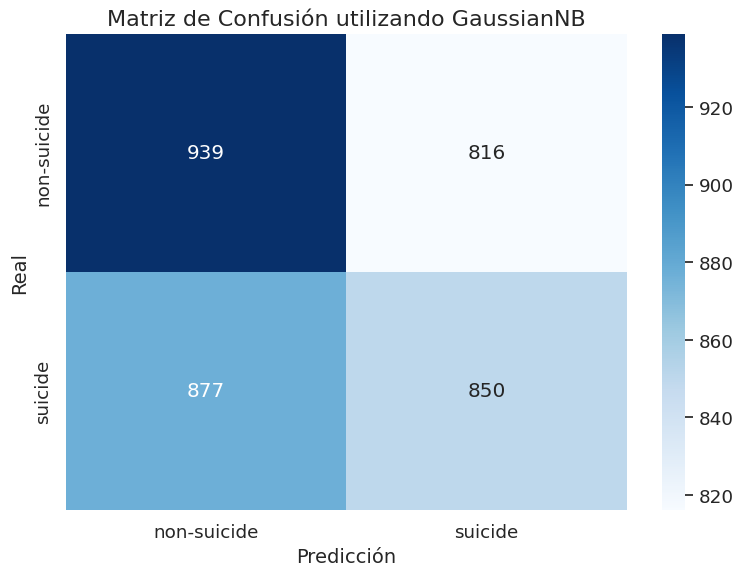

In [ ]:
#Se revisa la matriz de confusión
cm = confusion_matrix(labels_test, predictions)
class_labels = labeler.classes_
cm_df = pd.DataFrame(data=cm, columns=class_labels, index=class_labels)
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=True)
heatmap.set_xlabel("Predicción", fontsize=14)
heatmap.set_ylabel("Real", fontsize=14)
heatmap.set_title("Matriz de Confusión utilizando GaussianNB", fontsize=16)
plt.tight_layout()
plt.show()

### **7.1 Extracción de características con TF-IDF**

Realizamios pasos cruciales para preparar datos textuales para su uso en el modelo de clasificación. Inicialmente, las variables x e y se asignan a los textos y las etiquetas de clase respectivamente desde el DataFrame df_clean_embeddings. Luego, se utiliza TfidfVectorizer de scikit-learn, una técnica de vectorización que convierte los textos en vectores numéricos teniendo en cuenta la importancia relativa de las palabras. El parámetro min_df=50 asegura que solo se consideren las palabras que aparecen en al menos 50 documentos, y max_features=5000 limita la representación a las 5000 características más relevantes. Posteriormente, fit_transform se aplica a los textos (x), y los resultados se convierten en una matriz NumPy usando toarray().

In [ ]:
#Se realiza la extracción de características con el método TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
x,y = df_clean_embeddings['text_'],df_clean_embeddings['class']
vectorizer = TfidfVectorizer(min_df=50,max_features=5000)
x =  vectorizer.fit_transform(x).toarray()

### **7.2 Modelamiento y evaluación con la extracción de características obtenida con TF-IDF**

In [ ]:
#División del conjunto de datos en entrenamiento y test
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=5)

In [ ]:
#Aplicación de validación cruzada y el método GridSearchCV, para obtener los mejores hiperparámetros
param_grid = {"var_smoothing": 10. ** np.arange(-9, -3)}

gsearch = GridSearchCV(
    GaussianNB(),
    param_grid=param_grid,
    cv=5
    ).fit(X_train, y_train)


# Se revisa el tamaño de las matrices
display(X_train.shape)
display(X_test.shape)

(8122, 1645)

(3482, 1645)

In [ ]:
#Valor del hiperparámetro del mejor modelo
model = gsearch.best_estimator_
display(model)

GaussianNB(var_smoothing=1e-05)

### 7.3 Evaluación del modelo con la extracción de características de TF-IDF

In [ ]:
#Se calculan las predicciones sobre el conjunto de test
predictions = model.predict(X_test)

Al emplear una estrategia de modelado basada en una técnica de extracción de características más sencilla como TF-IDF, se evidencia una notable mejora en la capacidad de clasificación. Las métricas de precision, recall y f1-score, todas superiores a 0.8, indican que el modelo ha logrado un rendimiento significativamente mejor en la tarea de predecir la tendencia de un documento en comparación con la utilización de Doc2Vec. Este resultado sugiere que, en este contexto específico, la simplicidad de TF-IDF ha demostrado ser más efectiva que la complejidad introducida por la técnica de embeddings. Es posible que la representación TF-IDF, al ponderar la importancia de las palabras en función de su frecuencia y distribución en los documentos, haya capturado de manera más efectiva las características distintivas relacionadas con la tendencia suicida en comparación con los embeddings generados por Doc2Vec. Este hallazgo destaca la importancia de seleccionar la técnica de extracción de características más adecuada para la tarea específica en cuestión.

In [ ]:
#Se imprime el reporte con las métricas de clasificación
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

 non-suicide       0.87      0.82      0.85      1786
     suicide       0.82      0.88      0.85      1696

    accuracy                           0.85      3482
   macro avg       0.85      0.85      0.85      3482
weighted avg       0.85      0.85      0.85      3482



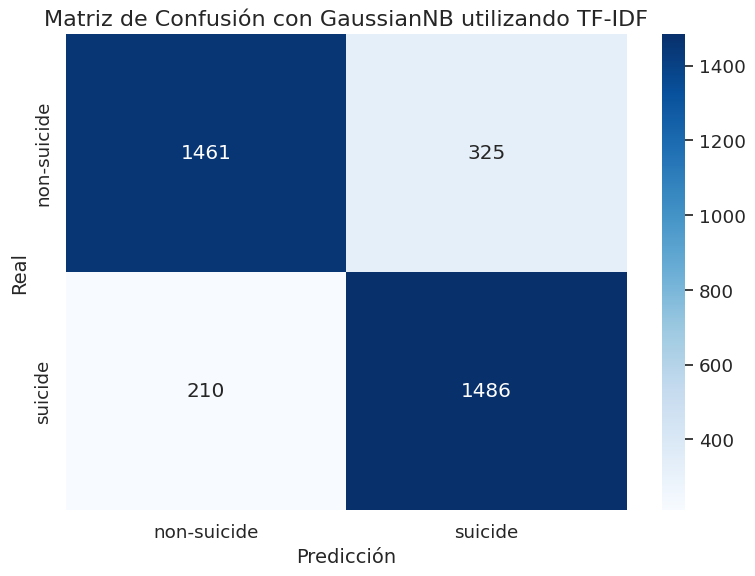

In [ ]:
#Se revisa la matriz de confusión

cm = confusion_matrix(y_test, predictions)
class_labels = labeler.classes_
cm_df = pd.DataFrame(data=cm, columns=class_labels, index=class_labels)
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=True)
heatmap.set_xlabel("Predicción", fontsize=14)
heatmap.set_ylabel("Real", fontsize=14)
heatmap.set_title("Matriz de Confusión con GaussianNB utilizando TF-IDF", fontsize=16)
plt.tight_layout()
plt.show()

### 7.4 Aplicación de otros algoritmos

#### 7.4.1 Multinomial Naive Bayes (MultinomialNB)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
param_grid = {"alpha": 10 ** np.arange(5)}
display(param_grid)

{'alpha': array([    1,    10,   100,  1000, 10000])}

In [ ]:
gsearch = GridSearchCV(
    MultinomialNB(),
    param_grid=param_grid,
    cv=5
    ).fit(X_train, y_train)

In [ ]:
model = gsearch.best_estimator_
display(model)

MultinomialNB(alpha=1)

In [ ]:
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

 non-suicide       0.94      0.82      0.88      1786
     suicide       0.83      0.94      0.88      1696

    accuracy                           0.88      3482
   macro avg       0.89      0.88      0.88      3482
weighted avg       0.89      0.88      0.88      3482



In [ ]:
cm = confusion_matrix(y_test, predictions)
cm = pd.DataFrame(data=cm, columns=labeler.classes_, index=labeler.classes_)

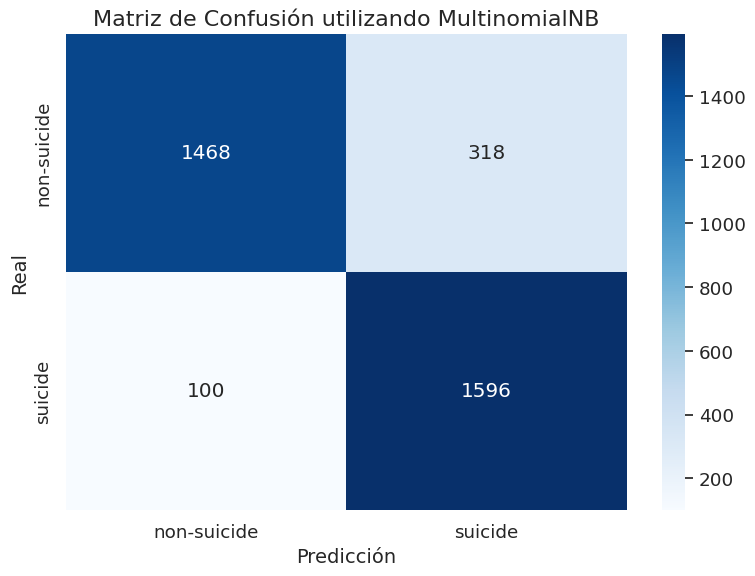

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
cm_df = pd.DataFrame(data=cm, columns=class_labels, index=class_labels)
sns.set(font_scale=1.2)
heatmap = sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=True)
heatmap.set_xlabel("Predicción", fontsize=14)
heatmap.set_ylabel("Real", fontsize=14)
heatmap.set_title("Matriz de Confusión utilizando MultinomialNB", fontsize=16)
plt.tight_layout()
plt.show()

#### 7.4.2 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200]
}

In [ ]:
rf_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    rf_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1  #Utiliza todos los núcleos
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'n_estimators': [50, 100, 200]}, scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

In [ ]:
predictions_rf = best_rf_model.predict(X_test)
print("\nInforme de Clasificación:\n", classification_report(y_test, predictions_rf))


Informe de Clasificación:
               precision    recall  f1-score   support

 non-suicide       0.89      0.87      0.88      1786
     suicide       0.86      0.89      0.88      1696

    accuracy                           0.88      3482
   macro avg       0.88      0.88      0.88      3482
weighted avg       0.88      0.88      0.88      3482



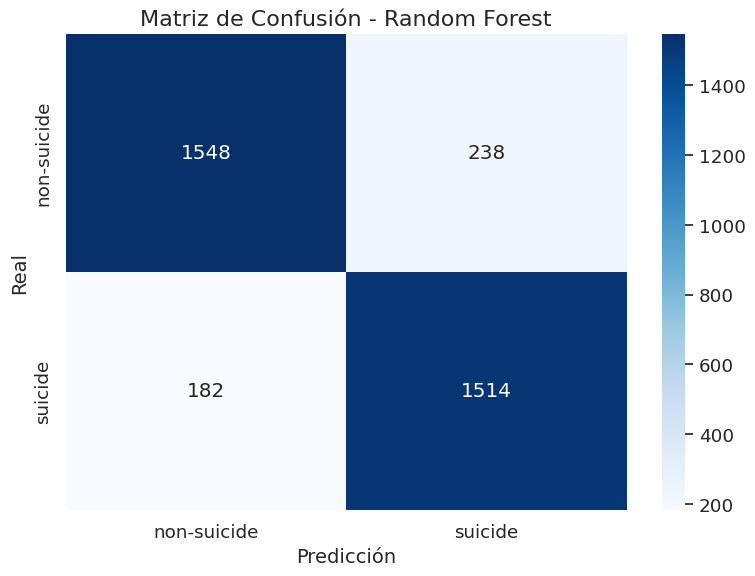

In [ ]:
cm_rf = confusion_matrix(y_test, predictions_rf)

fig, ax = plt.subplots(figsize=(8, 6))
sns.set(font_scale=1.2)
heatmap_rf = sns.heatmap(pd.DataFrame(cm_rf, columns=class_labels, index=class_labels),
                         annot=True, fmt="d", cmap="Blues", cbar=True)
heatmap_rf.set_xlabel("Predicción", fontsize=14)
heatmap_rf.set_ylabel("Real", fontsize=14)
heatmap_rf.set_title("Matriz de Confusión - Random Forest", fontsize=16)
plt.tight_layout()
plt.show()

### 7.5 Interpretación de los resultados

Modelo MultinomialNB:
Tras la aplicación del algoritmo MultinomialNB, se ha observado una mejora sustancial en las métricas de evaluación, lo que indica un rendimiento superior en comparación con los resultados anteriores. Esta mejora sugiere que el modelo es capaz de predecir con mayor precisión la tendencia suicida o no suicida de los tweets. Sin embargo, para obtener una visión más completa y robusta del rendimiento del modelo, sería beneficioso explorar otras técnicas de extracción de características y algoritmos de clasificación. Experimentar con conjuntos de datos más extensos podría proporcionar una perspectiva más generalizable de la capacidad predictiva del modelo.

Modelo Random Forest:
El informe de clasificación del modelo de Random Forest revela un rendimiento sólido en la tarea de clasificación binaria entre tweets con tendencia suicida y no suicida. Con una precisión, recall y puntuación F1 promedio del 88%, el modelo logra un equilibrio efectivo entre la capacidad de identificar tweets suicidas y no suicidas. Estas métricas indican que el modelo es capaz de clasificar correctamente la mayoría de los tweets en ambas clases, con una precisión del 90% para tweets no suicidas y del 87% para tweets suicidas. Además, las puntuaciones F1 equilibradas para ambas clases sugieren que el modelo es robusto y generalizable.

El modelo de Random Forest se posiciona como una herramienta eficaz para identificar tendencias suicidas en tweets, lo que podría ser crucial para la detección temprana y la intervención preventiva en problemas de salud mental en entornos en línea.

Exploración de Técnicas Avanzadas:
La posibilidad de emplear modelos preentrenados como BERT y técnicas de embeddings ofrece un enfoque más avanzado y posiblemente más preciso. Aunque estos métodos son computacionalmente más costosos, podrían proporcionar resultados más sofisticados y adaptados a la complejidad del lenguaje natural en tweets.

Extensión del Análisis:
Se plantea la idea de extender la evaluación del modelo a la totalidad de los datos disponibles en el conjunto de datos, ya que podría haber patrones y variaciones que no se capturan completamente en una muestra más pequeña. Esta ampliación del análisis podría proporcionar una comprensión más profunda de la capacidad predictiva del modelo en un contexto más amplio.

Análisis de Errores:
Examinar detenidamente los documentos mal clasificados es esencial para comprender las limitaciones y posiblemente mejorar el modelo. Identificar las causas subyacentes de las clasificaciones incorrectas puede conducir a ajustes en el preprocesamiento de datos o en la elección de características, permitiendo una iteración más efectiva en la mejora del modelo. Este análisis más profundo contribuirá a una comprensión más holística de la eficacia y las limitaciones del sistema de clasificación implementado.

Consideraciones Finales:
En resumen, los resultados obtenidos hasta ahora son alentadores, mostrando un rendimiento significativamente mejorado con el modelo MultinomialNB y un rendimiento sólido con el modelo de Random Forest. Sin embargo, hay oportunidades para explorar técnicas más avanzadas, utilizar conjuntos de datos más grandes y realizar un análisis más detallado de los errores para mejorar aún más la capacidad predictiva del modelo en la identificación de tweets suicidas.

## **Créditos**

* **Profesor:** [Felipe Restrepo Calle](https://dis.unal.edu.co/~ferestrepoca/)
* **Asistentes docentes:**
    - [Juan Sebastián Lara Ramírez](https://www.linkedin.com/in/juan-sebastian-lara-ramirez-43570a214/).
* **Diseño de imágenes:**
    - [Rosa Alejandra Superlano Esquibel](mailto:rsuperlano@unal.edu.co).
* **Coordinador de virtualización:**
    - [Edder Hernández Forero](https://www.linkedin.com/in/edder-hernandez-forero-28aa8b207/).

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*